In [43]:
from data_parsers.custom_instance_parser import parse
from plotting.drawer import plot_gantt_chart

from solution_methods.GA.src.initialization import initialize_run
from solution_methods.GA.run_GA import run_GA
from solution_methods.CP_SAT.run_cp_sat import run_CP_SAT
from scheduling_environment import jobShop, machine, operation, job

In [44]:
j = jobShop.JobShop()
j.set_instance_name('test')

In [45]:
h1 = jobShop.Job(0)
h2 = jobShop.Job(1)

In [46]:
j.set_nr_of_machines(3)

m0 = machine.Machine(0)
m1 = machine.Machine(1)
m2 = machine.Machine(2)
j.add_machine(m0)
j.add_machine(m1)
j.add_machine(m2)

In [47]:
# job, job_id, operation_id
o1 = operation.Operation(h1, h1.job_id, 0)
# machineID duration
# (alternative workstations) machine can  perform on either machine 0 or 1
o1.add_operation_option(m0.machine_id, 2)
o1.add_operation_option(m1.machine_id, 2)

o2  = operation.Operation(h2, h2.job_id, 1)
o2.add_operation_option(m0.machine_id, 2)

o3 = operation.Operation(h2, h2.job_id, 2)
o3.add_operation_option(m0.machine_id, 2)

In [48]:
h1.add_operation(o1)
j.add_operation(o1)
j.add_job(h1)

h2.add_operation(o2)
h2.add_operation(o3)
j.add_operation(o2)
j.add_operation(o3)
j.add_job(h2)

j.set_nr_of_jobs(2)

Horizon = 6
Solution 0, time = 0.004177 s, objective = 4
Solution:
Optimal Schedule Length: 4.0


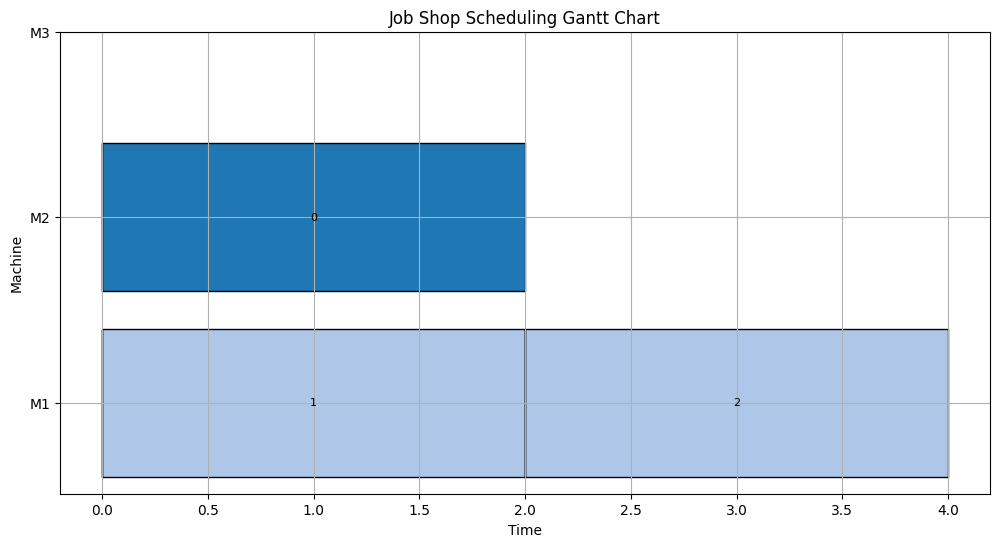

In [49]:
parameters = {"instance": {"problem_instance": "custom_problem_instance"},
             "solver": {"time_limit": 3600, "model": "fjsp"},
             "output": {"logbook": True}
             }

results, jobShopEnv = run_CP_SAT(j, **parameters)

plt = plot_gantt_chart(j)
plt.show()